# Machine Learning with Diabetes Dataset

## Columns Information

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies : Number of times pregnant <br>
Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
BloodPressure : Diastolic blood pressure (mm Hg) <br>
SkinThickness : Triceps skin fold thickness (mm) <br>
Insulin : 2-Hour serum insulin (mu U/ml) <br>
BMI : Body mass index (weight in kg/(height in m)^2) <br>
DiabetesPedigreeFunction : Diabetes pedigree function <br>
Age : Age (years) <br>
Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0 <br>

## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## Importing The Dataset

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### a value of zero does not make sense and thus indicates missing value.
#### Following columns or variables have an invalid zero value:
#### Glucose
#### BloodPressure
#### SkinThickness
#### Insulin
#### BMI

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [5]:
diabetes_data2 = diabetes_data.copy(deep = True)
diabetes_data2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
diabetes_data2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]\
.replace(0,np.NaN)
## showing the count of Nans
print(diabetes_data2.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
diabetes_data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### To fill these Nan values the data distribution needs to be understood

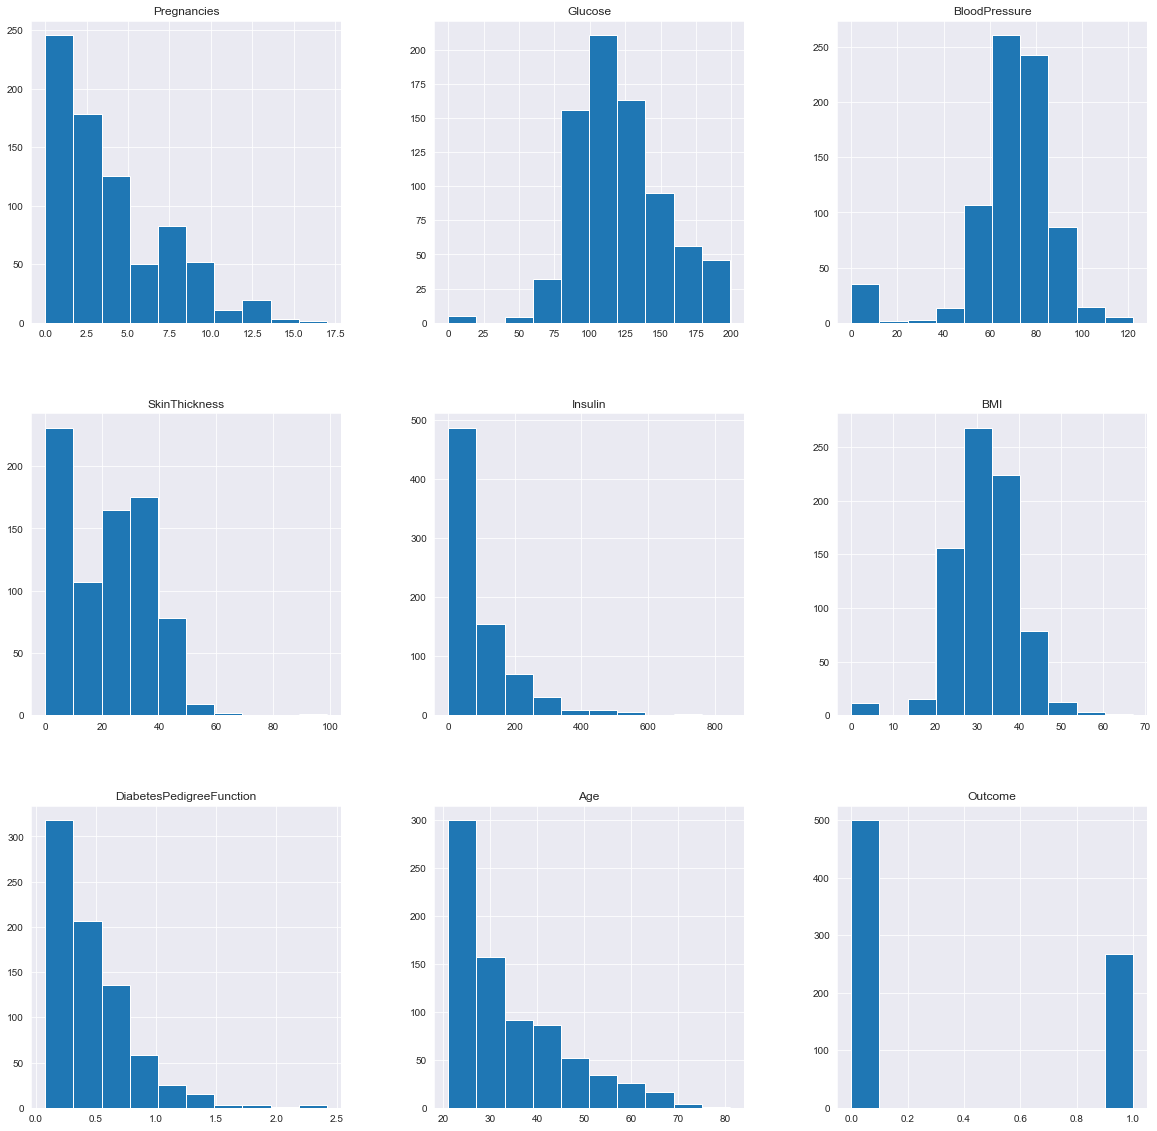

In [7]:
sns.set_style(style="darkgrid")
p = diabetes_data.hist(figsize = (20,20))

### Aiming to impute nan values for the columns in accordance with their distribution

In [8]:
diabetes_data2['Glucose'].fillna(diabetes_data2['Glucose'].mean(), inplace = True)
diabetes_data2['BloodPressure'].fillna(diabetes_data2['BloodPressure'].mean(),\
                                       inplace = True)
diabetes_data2['SkinThickness'].fillna(diabetes_data2['SkinThickness'].median(),\
                                       inplace = True)
diabetes_data2['Insulin'].fillna(diabetes_data2['Insulin'].median(), inplace = True)
diabetes_data2['BMI'].fillna(diabetes_data2['BMI'].median(), inplace = True)

In [9]:
diabetes_data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## Ploting after Nan removal

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

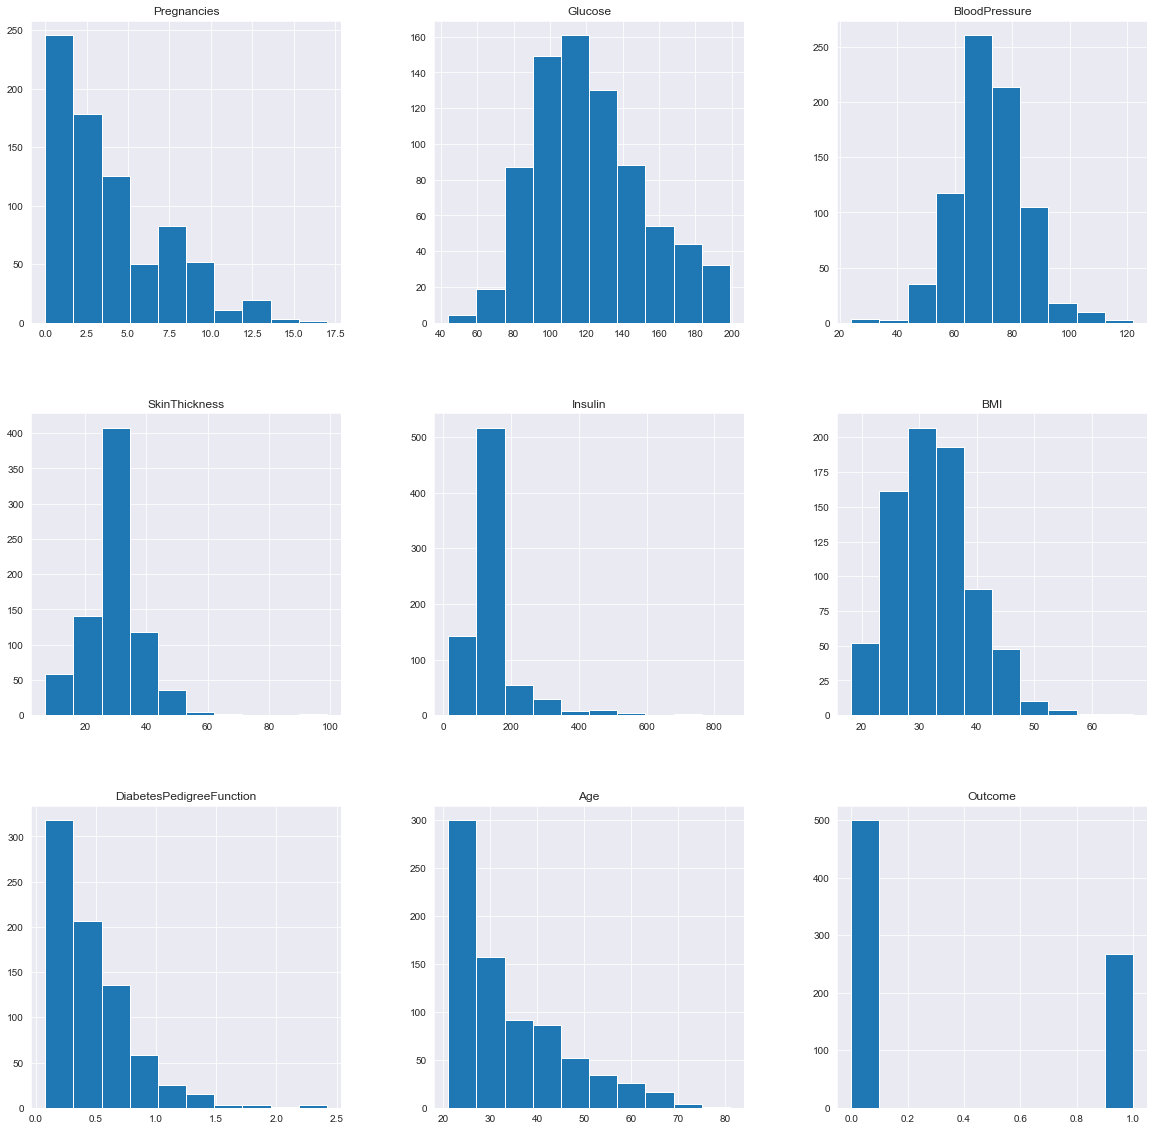

In [10]:
sns.set_style(style="darkgrid")
diabetes_data2.hist(figsize=(20,20))

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

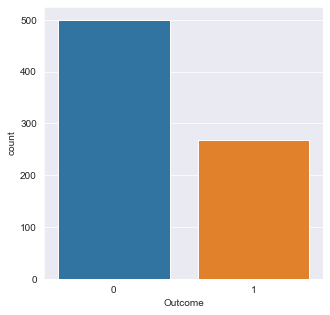

In [11]:
print(diabetes_data.Outcome.value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="Outcome",data=diabetes_data)
# p=diabetes_data.Outcome.value_counts().plot(kind='bar')

## Splitng the Dataset to Training Set and Test Set

In [12]:
x = diabetes_data.iloc[:,:-1].values
y = diabetes_data.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=20)

## Feature Scaling

In [13]:
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Training the K-NN model on the Training set

In [14]:
train_scores = []
test_scores = []

# Add the Score to List
for i in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train,y_train)
    train_scores.append(knn_classifier.score(x_train,y_train))
    test_scores.append(knn_classifier.score(x_test,y_test))

# get maximum index of trian score
max_train_score = max(train_scores)
train_score_index = [i for i,v in enumerate(train_scores) if v == max_train_score]
print(f"Max Train Score Is {max_train_score * 100}% and K ={list(map(lambda x :x+1,train_score_index))}")

# get maximum index of test score
max_test_score = max(test_scores)
test_score_index = [i for i,v in enumerate(test_scores) if v == max_test_score]
print(f"Max Test Score Is {max_test_score * 100}% and K ={list(map(lambda x :x+1,test_score_index))}",'\n')

# Confusion Matrix
knn_cls = KNeighborsClassifier(10)
knn_cls.fit(x_train,y_train)
y_pred = knn_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],\
                  margins=True),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)}",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

Max Train Score Is 100.0% and K =[1]
Max Test Score Is 76.62337662337663% and K =[10] 

Predicted    0   1  All
True                   
0          134  19  153
1           35  43   78
All        169  62  231 

accuracy score is :0.7662337662337663 

[[1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 

## Plotting the Scores

C:\Users\imanr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imanr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


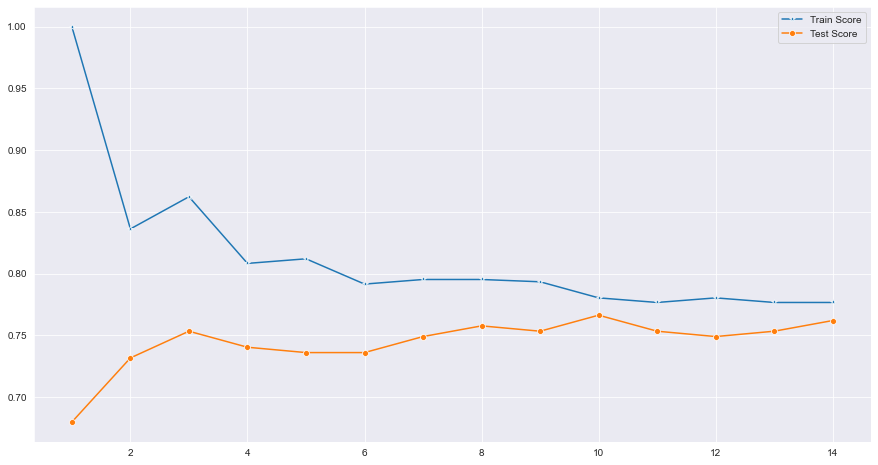

In [15]:
plt.figure(figsize=(15,8))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

## Logistic Regression

In [16]:
Lg_classifier = LogisticRegression()
Lg_classifier.fit(x_train,y_train)

# Confusion Matrix
y_pred = Lg_classifier.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],\
                  margins=True),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)}",'\n')

# Compare prediction with y_test
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicted    0   1  All
True                   
0          134  19  153
1           37  41   78
All        171  60  231 

accuracy score is :0.7575757575757576 

[[0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0

## Training the SVM model on the Training set

In [17]:
svm_cls = SVC(kernel="linear",random_state=0)
svm_cls.fit(x_train,y_train)

# Confusion Matrix
y_pred = svm_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],\
                  margins=True),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)}",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

Predicted    0   1  All
True                   
0          136  17  153
1           39  39   78
All        175  56  231 

accuracy score is :0.7575757575757576 

[[1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1

## Training the Kernel SVM model on the Training set

In [18]:
kernel_svm = SVC(kernel="rbf",random_state=0)
kernel_svm.fit(x_train,y_train)

# Confusion Matrix
y_pred = kernel_svm.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],\
                  margins=True),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)}",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predicted    0   1  All
True                   
0          130  23  153
1           38  40   78
All        168  63  231 

accuracy score is :0.7359307359307359 

[[1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1

## Training the Naive Bayes model on the Training set

In [19]:
naive_cls = GaussianNB()
naive_cls.fit(x_train,y_train)

# Confusion Matrix
y_pred = naive_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],\
                  margins=True),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)}",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predicted    0   1  All
True                   
0          129  24  153
1           35  43   78
All        164  67  231 

accuracy score is :0.7445887445887446 

[[1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1

## Training the Decision Tree Classification model on the Training set

In [20]:
dt_cls = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_cls.fit(x_train,y_train)

# Confusion Matrix
y_pred = dt_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predict']\
                  ,margins=True),'\n')
print(f"accuracy score is : {accuracy_score(y_test,y_pred)}","\n")

# Compare Prediction With y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predict    0   1  All
True                 
0        115  38  153
1         32  46   78
All      147  84  231 

accuracy score is : 0.696969696969697 

[[1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 

## Training the Random Forest Classification model on the Training set

In [21]:
rf_cls = RandomForestClassifier(n_estimators =200, criterion = 'entropy', random_state = 0)
rf_cls.fit(x_train, y_train)

# Confusion Matrix
y_pred = rf_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predict']\
                  ,margins=True),'\n')
print(f"accuracy score is : {accuracy_score(y_test,y_pred)}","\n")

# Compare Prediction With y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predict    0   1  All
True                 
0        132  21  153
1         30  48   78
All      162  69  231 

accuracy score is : 0.7792207792207793 

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
